# <center>TRANSFER LEARNING REPORT</center>
***
## <font color = blue>I. LIBRARIES AND DATA</font>

## <font color = blue>II. COMPARISON BETWEEN ALGORITHMS</font>

## <font color = blue>III. COMPARISON BETWEEN ALGORITHMS WITH LIMITED TYPES</font>
***

## <font color = blue>I. LIBRARIES AND DATA</font>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

In [4]:
df = pd.read_csv('../data/classification_report.csv')
df.tail(20)

,index,precision,recall,f1-score,support,classifier,category
653,accuracy,0.910853,0.910853,0.910853,0.910853,ResNet50 AugmentedData,ComputerVision target_limited_corr
654,macro avg,0.889007,0.837163,0.860126,258.000000,ResNet50 AugmentedData,ComputerVision target_limited_corr
655,weighted avg,0.911072,0.910853,0.909892,258.000000,ResNet50 AugmentedData,ComputerVision target_limited_corr
656,budget,0.333333,0.111111,0.166667,9.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
657,email,0.833333,0.625000,0.714286,8.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
658,file folder,0.833333,0.714286,0.769231,7.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
659,id piece,1.000000,0.925926,0.961538,27.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
660,invoice,0.368421,0.500000,0.424242,14.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
661,other_types,0.600000,0.675000,0.635294,40.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
662,passport,0.875000,0.954545,0.913043,22.000000,ResNet50 AugmentedData,ComputerVision target_min_corr


## <font color = blue>II. COMPARISON BETWEEN ALGORITHMS</font>

In [5]:
# Extract precision and recall from Computer Vision algorithms with category "targets_min" (14 different types)
# ID documents
df_id_target_min = df.loc[(df['index'] == "id piece") & (df.category == "ComputerVision target_min")]
df_id_target_min = df_id_target_min.loc[(df_id_target_min.classifier != "ResNet50 AugmentedData")
                                        & (df_id_target_min.classifier != "EfficientNetB0 AugmentedData")]
df_id_target_min = df_id_target_min.sort_values(by ='classifier', ascending = False)

# Passports
df_passports_target_min = df.loc[(df['index'] == "passport") & (df.category == "ComputerVision target_min")]
df_passports_target_min = df_passports_target_min.loc[(df_passports_target_min.classifier != "ResNet50 AugmentedData")
                                                      & (df_passports_target_min.classifier != "EfficientNetB0 AugmentedData")]
df_passports_target_min = df_passports_target_min.sort_values(by ='classifier', ascending = False)

# Accuracy
df_accuracy_target_min = df.loc[(df['index'] == "accuracy") & (df.category == "ComputerVision target_min")]
df_accuracy_target_min = df_accuracy_target_min.loc[(df_accuracy_target_min.classifier != "ResNet50 AugmentedData")
                                                      & (df_accuracy_target_min.classifier != "EfficientNetB0 AugmentedData")]
df_accuracy_target_min = df_accuracy_target_min.sort_values(by ='classifier', ascending = False)

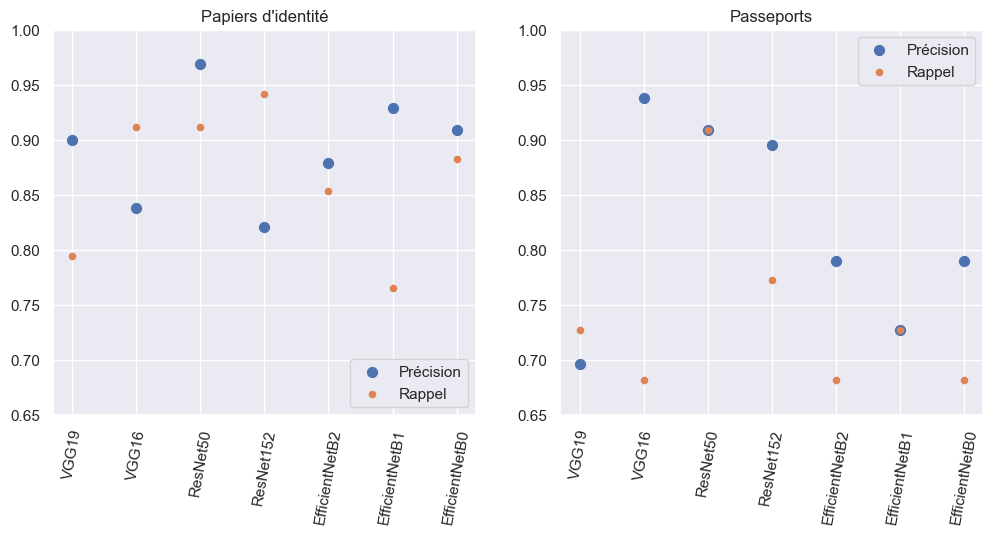

In [6]:
plt.figure(figsize = (12, 5))

plt.subplot(121)
plt.scatter('classifier', 'precision', s = 50, data = df_id_target_min, label = 'Précision')
plt.scatter('classifier', 'recall', s = 20, data = df_id_target_min, label = 'Rappel')
plt.xticks(rotation = 80)
plt.ylim([0.65, 1.0])
plt.title("Papiers d'identité")
plt.legend(loc = 'lower right')

plt.subplot(122)
plt.scatter('classifier', 'precision', s = 50, data = df_passports_target_min, label = 'Précision')
plt.scatter('classifier', 'recall', s = 20, data = df_passports_target_min, label = 'Rappel')
plt.xticks(rotation = 80)
plt.ylim([0.65, 1.0])
plt.title("Passeports")
plt.legend(loc = 'upper right')

plt.show()

<Figure size 500x500 with 0 Axes>

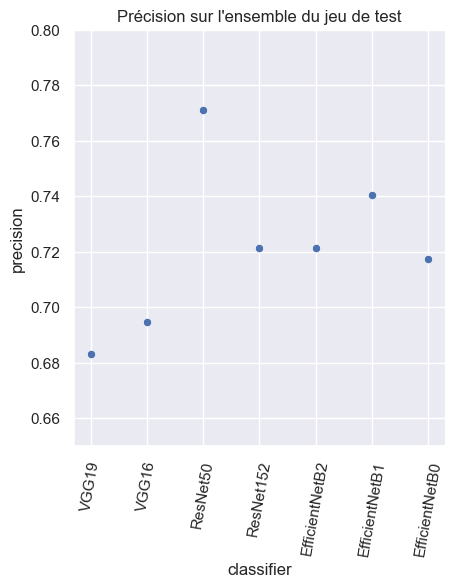

In [7]:
plt.figure(figsize = (5, 5))

sns.relplot(x = 'classifier',y = 'precision', data = df_accuracy_target_min, label = 'Précision globale')
plt.xticks(rotation = 80)
plt.ylim([0.65, 0.8])
plt.title("Précision sur l'ensemble du jeu de test")

plt.show()

<font color = blue> CONCLUSION: <br>
    ResNet50 is above other Transfer Learning algorithms in term of performance. <br>
    In the next chapter, we will focus on this algorihm. </font>

## <font color = blue>III. COMPARISON BETWEEN ALGORITHMS WITH LIMITED TYPES</font>

In [33]:
# Extract precision and recall from Computer Vision algorithms with category "targets_limited" (7 different types)
# ID documents
df_id_target_limited = df.loc[(df['index'] == "id piece") & (df['classifier'] == "ResNet50 AugmentedData") &
                              ((df.category == "ComputerVision target_min") | (df.category == "ComputerVision target_min_corr"))]

# Passports
df_passports_target_limited = df.loc[(df['index'] == "passport") & (df['classifier'] == "ResNet50 AugmentedData") &
                                     ((df.category == "ComputerVision target_min") | (df.category == "ComputerVision target_min_corr"))]

# Accuracy
df_accuracy_target_limited = df.loc[(df['index'] == "accuracy") & (df['classifier'] == "ResNet50 AugmentedData") &
                                    ((df.category == "ComputerVision target_min") | (df.category == "ComputerVision target_min_corr"))]

In [34]:
df_target_limited = pd.concat([df_id_target_limited, df_passports_target_limited, df_accuracy_target_limited])

In [35]:
df_target_limited

,index,precision,recall,f1-score,support,classifier,category
588,id piece,0.885714,0.911765,0.898551,34.000000,ResNet50 AugmentedData,ComputerVision target_min
659,id piece,1.000000,0.925926,0.961538,27.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
591,passport,0.904762,0.863636,0.883721,22.000000,ResNet50 AugmentedData,ComputerVision target_min
662,passport,0.875000,0.954545,0.913043,22.000000,ResNet50 AugmentedData,ComputerVision target_min_corr
599,accuracy,0.748092,0.748092,0.748092,0.748092,ResNet50 AugmentedData,ComputerVision target_min
670,accuracy,0.744186,0.744186,0.744186,0.744186,ResNet50 AugmentedData,ComputerVision target_min_corr


In [36]:
dico = {'id piece': "Précision Pièces d'identité",
        'passport': 'Précision Passeports',
        'accuracy': 'Précision globale',
        'ComputerVision target_limited': 'Sans correction du labelling',
        'ComputerVision target_limited_corr': 'Avec correction du labelling'}
df_target_limited = df_target_limited.replace(dico)

In [37]:
df_target_limited = pd.concat([df_target_limited, df_id_target_limited, df_passports_target_limited])

In [38]:
dico = {'id piece': "Rappel Pièces d'identité",
        'passport': 'Rappel Passeports',
        'ComputerVision target_limited': 'Sans correction du labelling',
        'ComputerVision target_limited_corr': 'Avec correction du labelling'}
df_target_limited = df_target_limited.replace(dico)

In [39]:
df_target_limited = df_target_limited.drop(columns = ['f1-score', 'support', 'classifier'])
df_target_limited = df_target_limited.rename(columns = {'index': 'label_metric', 'precision': 'performance'})

In [40]:
df_target_limited

,label_metric,performance,recall,category
588,Précision Pièces d'identité,0.885714,0.911765,ComputerVision target_min
659,Précision Pièces d'identité,1.000000,0.925926,ComputerVision target_min_corr
591,Précision Passeports,0.904762,0.863636,ComputerVision target_min
662,Précision Passeports,0.875000,0.954545,ComputerVision target_min_corr
599,Précision globale,0.748092,0.748092,ComputerVision target_min
670,Précision globale,0.744186,0.744186,ComputerVision target_min_corr
588,Rappel Pièces d'identité,0.885714,0.911765,ComputerVision target_min
659,Rappel Pièces d'identité,1.000000,0.925926,ComputerVision target_min_corr
591,Rappel Passeports,0.904762,0.863636,ComputerVision target_min
662,Rappel Passeports,0.875000,0.954545,ComputerVision target_min_corr


In [41]:
df_target_limited = df_target_limited.reset_index(drop = True)

In [42]:
for i in range(6, 10):
    df_target_limited.at[i, 'performance'] = df_target_limited.recall[i]
df_target_limited = df_target_limited.drop(columns = ['recall'])

In [43]:
df_target_limited

,label_metric,performance,category
0,Précision Pièces d'identité,0.885714,ComputerVision target_min
1,Précision Pièces d'identité,1.000000,ComputerVision target_min_corr
2,Précision Passeports,0.904762,ComputerVision target_min
3,Précision Passeports,0.875000,ComputerVision target_min_corr
4,Précision globale,0.748092,ComputerVision target_min
5,Précision globale,0.744186,ComputerVision target_min_corr
6,Rappel Pièces d'identité,0.911765,ComputerVision target_min
7,Rappel Pièces d'identité,0.925926,ComputerVision target_min_corr
8,Rappel Passeports,0.863636,ComputerVision target_min
9,Rappel Passeports,0.954545,ComputerVision target_min_corr


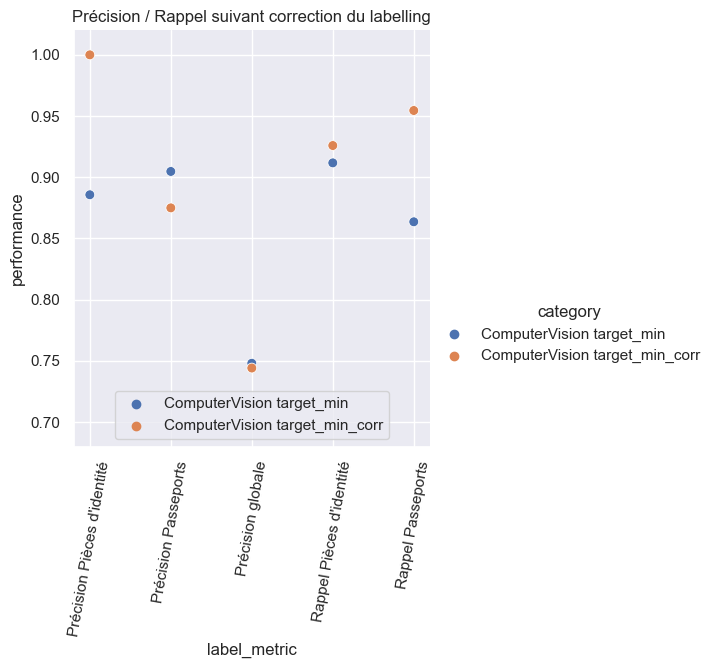

In [46]:
sns.relplot(kind = 'scatter', x = 'label_metric', y = 'performance', hue = 'category', s = 50,
            legend = 'auto', data = df_target_limited)
plt.xticks(rotation = 80)
plt.ylim([0.68, 1.02])
plt.title("Précision / Rappel suivant correction du labelling")
plt.legend(loc = 'lower center')

plt.show()